# Time Series Analysis

**Time series** is data that has shifts and changes across continuous time intervals. Time series data can have seasonality characteristics, such as weather trends, or volatile patterns like the stock market. Creating predictive models for time series data is tricky because of its contant movement, and there are different methods used for forecasting depending on the industry.

In this lesson, we will focus on visual analyzing patterns from past time series data to create insights about how to approach future decisions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Datetime in `pandas`

When time series is read into a `pandas` dataframe, it is categorized as a string object. But in order to use time-specific information such as year or month, we need to convert it into a **datetime** data type using the `pd.to_datetime()` function.

In [2]:
timestamp = '2018-01-15 3:45pm'

In [3]:
pd.to_datetime(timestamp)

Timestamp('2018-01-15 15:45:00')

In [4]:
date = '03/04/2019'

In [5]:
pd.to_datetime(date, dayfirst=True)

Timestamp('2019-04-03 00:00:00')

In [6]:
pd.to_datetime("July 4, 2020")

Timestamp('2020-07-04 00:00:00')

In [7]:
dates = ['07-04-2014', '08-04-2014','07-04-2015', '08-04-2015']
prices = [125, 372, 94, 537]
dateslist = list(zip(dates, prices))

df = pd.DataFrame(data=dateslist, columns=['date', 'prices'])
df

,date,prices
0,07-04-2014,125
1,08-04-2014,372
2,07-04-2015,94
3,08-04-2015,537


In [8]:
df.dtypes

date      object
prices     int64
dtype: object

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

In [10]:
df.dtypes

date      datetime64[ns]
prices             int64
dtype: object

In [11]:
df

,date,prices
0,2014-07-04,125
1,2014-08-04,372
2,2015-07-04,94
3,2015-08-04,537


In [12]:
df['month'] = df['date'].dt.month_name()
df

,date,prices,month
0,2014-07-04,125,July
1,2014-08-04,372,August
2,2015-07-04,94,July
3,2015-08-04,537,August


In [13]:
df['weekday'] = df['date'].dt.day_name()
df

,date,prices,month,weekday
0,2014-07-04,125,July,Friday
1,2014-08-04,372,August,Monday
2,2015-07-04,94,July,Saturday
3,2015-08-04,537,August,Tuesday


## Visual Analysis of Fremont Bridge

Using data from the [City of Seattle Open Data Portal](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k), we will analyze trends of bicycle traffic on the Fremont Bridge to understand frequency of use for different times and days.

In [14]:
#make dates the index
#format dates as we load the data
# parse_dates used only date collected by machine (not input manually by person)
bikes_df = pd.read_csv('datasets/FremontBridgeBicycle.csv', index_col="Date", parse_dates=True)
bikes_df.head()p

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [15]:
bikes_df.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,53271.000000,53271.000000
mean,57.434401,54.368549
std,82.795998,71.282743
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,70.000000,72.000000
max,717.000000,698.000000


In [16]:
#rename columns with shorter name
#create a new column 'Total' with combined values of west and east columns
bikes_df.columns = ['East', 'West']
bikes_df['Total'] = bikes_df.eval('East + West')
# equal to bikes_df['East'] + bikes_df['West']

In [28]:
bikes_df.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


Text(0, 0.5, 'Hourly Bicycle Count')

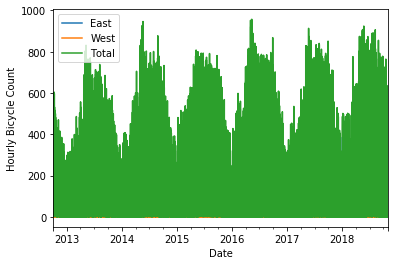

In [17]:
#bar plot of data
bikes_df.plot()
plt.ylabel('Hourly Bicycle Count')

In [18]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = bikes_df.resample('W').sum()
weekly.head()

,East,West,Total
Date,,,
2012-10-07,6995.0,7297.0,14292.0
2012-10-14,8116.0,8679.0,16795.0
2012-10-21,7563.0,7946.0,15509.0
2012-10-28,6536.0,6901.0,13437.0
2012-11-04,5786.0,6408.0,12194.0


Text(0, 0.5, 'Weekly Bicycle Count')

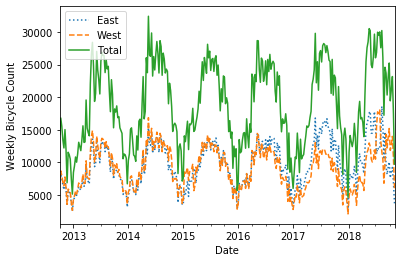

In [19]:
# plot data by week
weekly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Bicycle Count')

People tend to bike more in the summers than in the winters

In [20]:
#see what an average day looks like
by_time = bikes_df.groupby(bikes_df.index.time).mean()
by_time

,East,West,Total
00:00:00,6.741892,5.295495,12.037387
01:00:00,3.387387,2.924775,6.312162
02:00:00,2.133634,2.081264,4.214898
03:00:00,1.417568,1.631081,3.048649
04:00:00,2.942342,3.648198,6.590541
05:00:00,9.600450,16.571622,26.172072
06:00:00,34.138288,57.562162,91.700450
07:00:00,78.095045,150.670721,228.765766
08:00:00,118.479279,202.232432,320.711712
09:00:00,78.788644,109.425868,188.214511


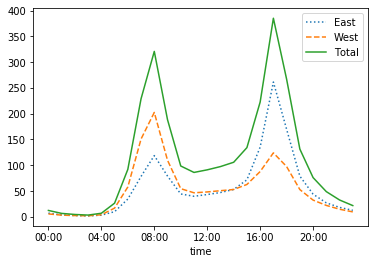

In [21]:
# create less cluttered tick markers for graph
hourly_ticks = 4*60*60*np.arange(6) #6 intervals of 4 hours
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

Bike usage peaks around 8am and 5pm

### What does bike usage look like by day of the week?

In [22]:

by_weekday = bikes_df.groupby(bikes_df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

by_weekday

,East,West,Total
Mon,68.231730,62.413118,130.644848
Tue,73.011307,67.605180,140.616487
Wed,72.623821,66.558176,139.181997
Thur,68.074395,63.418638,131.493034
Fri,61.687221,57.070076,118.757297
Sat,30.073475,32.284043,62.357518
Sun,28.276996,31.181113,59.458109


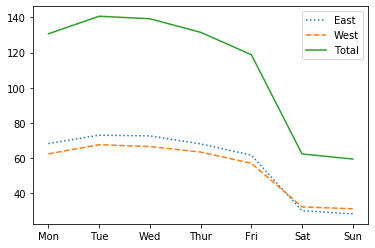

In [23]:
by_weekday.plot(style=[':','--','-'])

Bike usage is highest during weekdays and drops off on weekends

In [24]:
# Monday = 0, Tuesday = 1, ..., Sunday = 6
#set conditions to show hourly trend on weekdays vs weekends
weekend = np.where(bikes_df.index.weekday < 5, 'Weekday', 'Weekend')
by_weektime = bikes_df.groupby([weekend, bikes_df.index.time]).mean()

In [25]:
by_weektime

East        West       Total
Weekday 00:00:00    5.616646    4.600252   10.216898
        01:00:00    2.625473    2.350567    4.976040
        02:00:00    1.660782    1.707440    3.368222
        03:00:00    1.293190    1.497478    2.790668
        04:00:00    3.284994    4.342371    7.627364
        05:00:00   12.124842   21.496217   33.621059
        06:00:00   44.283102   77.169609  121.452711
        07:00:00  103.431274  204.063682  307.494956
        08:00:00  154.981084  270.314628  425.295712
        09:00:00   95.291483  135.668139  230.959621
        10:00:00   44.016404   54.544479   98.560883
        11:00:00   33.926814   39.879495   73.806309
        12:00:00   36.225237   39.849842   76.075079
        13:00:00   40.134300   42.194199   82.328499
        14:00:00   48.225725   45.167087   93.392812
        15:00:00   74.413619   59.441362  133.854981
        16:00:00  165.027112   96.728878  261.755990
        17:00:00  345.211223  151.732030  496.943253
        18:00:00  221.565574  119.021438  340.587011
        19:00:00   98.963430   62.368852  161.332282
        20:00:00   52.647541   37.052333   89.699874
        21:00:00   31.238335   24.926860   56.165195
        22:00:00   20.177806   16.027112   36.204918
        23:00:00   13.071879    9.829130   22.901009
Weekend 00:00:00    9.556782    7.034700   16.591483
        01:00:00    5.293375    4.361199    9.654574
        02:00:00    3.325914    3.023847    6.349762
        03:00:00    1.728707    1.965300    3.694006
        04:00:00    2.085174    1.911672    3.996845
        05:00:00    3.285489    4.252366    7.537855
        06:00:00    8.760252    8.512618   17.272871
        07:00:00   14.714511   17.104101   31.818612
        08:00:00   27.167192   31.919558   59.086751
        09:00:00   37.531546   43.820189   81.351735
        10:00:00   43.949527   53.728707   97.678233
        11:00:00   53.477918   62.343849  115.821767
        12:00:00   59.611987   68.190852  127.802839
        13:00:00   63.498423   70.801262  134.299685
        14:00:00   64.481073   71.526814  136.007886
        15:00:00   64.164038   70.082019  134.246057
        16:00:00   59.408517   64.564669  123.973186
        17:00:00   51.364353   53.854890  105.219243
        18:00:00   39.477918   42.558360   82.036278
        19:00:00   27.676656   28.028391   55.705047
        20:00:00   21.219243   19.790221   41.009464
        21:00:00   15.558360   13.970032   29.528391
        22:00:00   12.403785   10.301262   22.705047
        23:00:00   10.268139    7.712934   17.981073

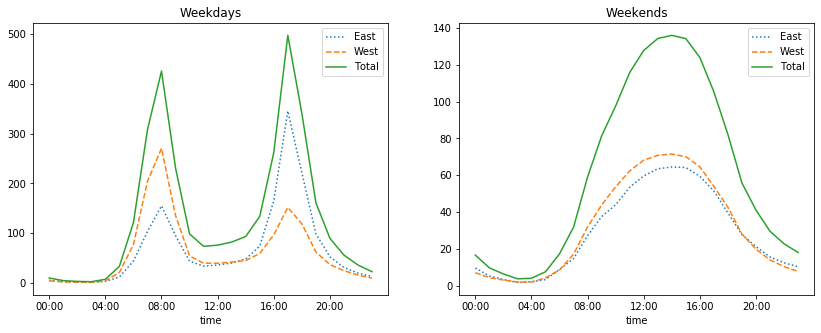

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_weektime.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])

by_weektime.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])